# Plotting in Julia

The three most popular options (as far as I know) in Julia are

- [Gadfly.jl](https://github.com/GiovineItalia/Gadfly.jl)
    - Julia equivalent of `ggplot2` in R
    
    
- [PyPlot.jl](https://github.com/JuliaPy/PyPlot.jl)
    - Wrapper for Python's matplotlib
    
    
- [Plots.jl](https://github.com/JuliaPlots/Plots.jl)
    - Defines an unified interface for plotting
    - maps arguments to different plotting "backends"
        - PyPlot, GR, PlotlyJS, and many more
        
## Plots.jl

We demonstrate Plots.jl below:

In [1]:
# Pkg.add("Plots")
using Plots, Random

Random.seed!(123) # set seed
x = cumsum(randn(50, 2), dims=1);

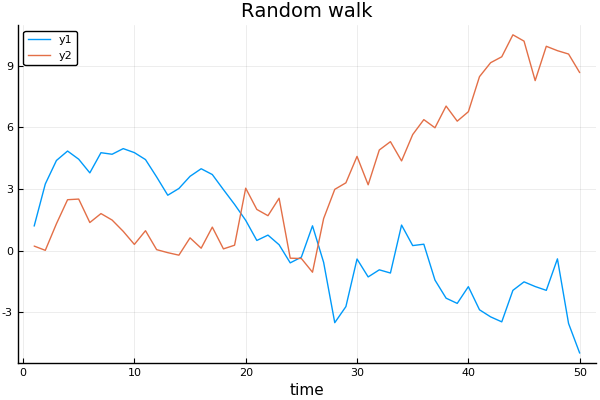

In [2]:
# Pkg.add("PyPlot")
pyplot()  # set the backend to PyPlot
plot(x, title="Random walk", xlab="time")

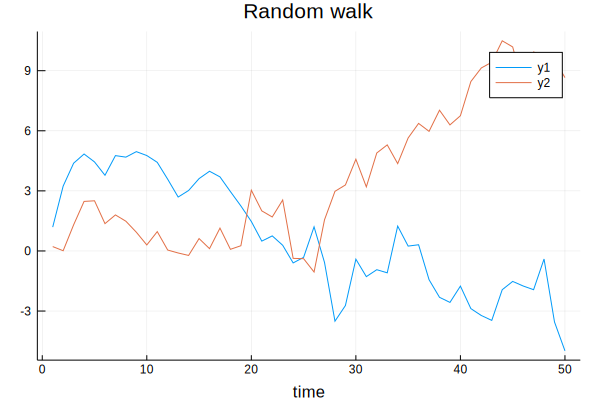

In [3]:
gr()   # change backend to GR
plot(x, title="Random walk", xlab="time")

In [4]:
gr()
@gif for i in 1:20
    plot(x -> sin(x) / (.2i), 0, i, xlim=(0, 20), ylim=(-.75, .75))
    scatter!(x -> cos(x) * .01 * i, 0, i, m=1)
end;

┌ Info: Saved animation to 
│   fn = /Users/huazhou/Documents/github.com/Hua-Zhou.github.io/teaching/biostatm280-2019spring/slides/02-juliaintro/tmp.gif
└ @ Plots /Users/huazhou/.julia/packages/Plots/47Tik/src/animation.jl:90


In [5]:
## Pkg.add("PlotlyJS")
#plotlyjs()  # change backend to Plotly
#plot(x, title="Random walk", xlab="time")

## Gadfly.jl

To demonstrate Gadfly, we will go through an example and compare it to ggplot2. 

In [6]:
#Pkg.add("Gadfly")
#Pkg.add("StatsPlots")

┌ Warning: RCall.jl: 
│ Attaching package: ‘dplyr’
│ 
│ The following objects are masked from ‘package:stats’:
│ 
│     filter, lag
│ 
│ The following objects are masked from ‘package:base’:
│ 
│     intersect, setdiff, setequal, union
│ 
└ @ RCall /Users/huazhou/.julia/packages/RCall/ffM0W/src/io.jl:113


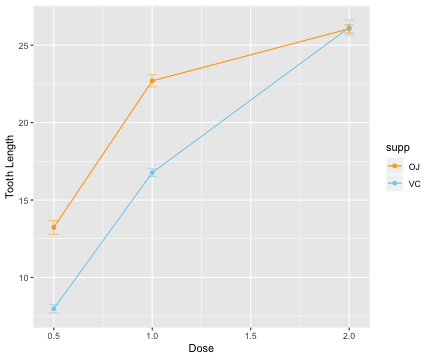

RObject{VecSxp}


In [1]:
using RCall

R"""
library(ggplot2)
library(dplyr)

df <- ToothGrowth %>%
        group_by(supp, dose) %>%
            summarise(se = sd(len) / n(),
                    len = mean(len),
                    n = n())

df <- data.frame(df)

ggplot(df, aes(x = dose, y = len, group = supp, color = supp)) + 
  geom_line() +
  geom_point() +
  geom_errorbar(aes(ymin = len - se, ymax = len + se), width = 0.1, alpha = 0.5,
  position = position_dodge(0.005)) +  
  scale_color_manual(values = c(VC = "skyblue", OJ = "orange")) + 
  labs(x = "Dose", y = "Tooth Length") 
"""

┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /Users/huazhou/.julia/packages/Gadfly/09PWZ/src/mapping.jl:228


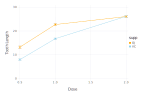

In [2]:
@rget df
using Gadfly, StatsPlots
df[:ymin] = df[:len] - df[:se]
df[:ymax] = df[:len] + df[:se]
Gadfly.plot(df, x = :dose, y = :len, color = :supp, Geom.point,
                Guide.xlabel("Dose"), Guide.ylabel("Tooth Length"), 
                Guide.xticks(ticks = [0.5, 1.0, 1.5, 2.0]),
                Geom.line, Geom.errorbar, ymin = :ymin,
                ymax = :ymax, Scale.color_discrete_manual("orange", "skyblue"))

Both offer more customized options

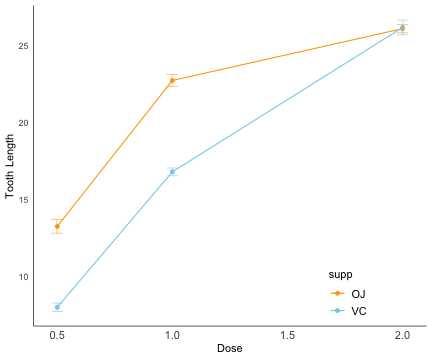

RObject{VecSxp}


In [3]:
R"""
ggplot(df, aes(x = dose, y = len, group = supp, color = supp)) + 
  geom_line() +
  geom_point() +
  geom_errorbar(aes(ymin = len - se, ymax = len + se), width = 0.1, alpha = 0.5, position = position_dodge(0.005)) + 
  theme(legend.position = c(0.8,0.1), legend.key = element_blank(), axis.text.x = element_text(angle = 0, size = 11), 
        axis.ticks = element_blank(), panel.grid.major = element_blank(), legend.text=element_text(size = 11),
        panel.border = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), 
        axis.line = element_line(color = 'black',size = 0.3), plot.title = element_text(hjust = 0.5)) + 
  scale_color_manual(values = c(VC = "skyblue", OJ = "orange")) + 
  labs(x = "Dose", y = "Tooth Length") 
"""

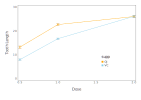

In [4]:
Gadfly.plot(df, x = :dose, y = :len, color = :supp, Geom.point,
                Guide.xlabel("Dose"), Guide.ylabel("Tooth Length"), Guide.xticks(ticks = [0.5, 1.0, 1.5, 2.0]),
                Theme(panel_fill = nothing, highlight_width = 0mm, point_size = 0.5mm,
                key_position = :inside, grid_line_width = 0mm, panel_stroke = colorant"black"),
                Geom.line, Geom.errorbar, ymin = :ymin,
                ymax = :ymax, Scale.color_discrete_manual("orange", "skyblue"))